In [1]:
import pandas as pd
import numpy as np
import glob
from difflib import SequenceMatcher
import time
# from translate import Translator
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from helper_functions import *

# Load files

In [2]:
df = pd.read_csv("file2.csv", lineterminator='\n')
tweets = list(df["tweets"])
times = list(df["times"])

# Histogram of times

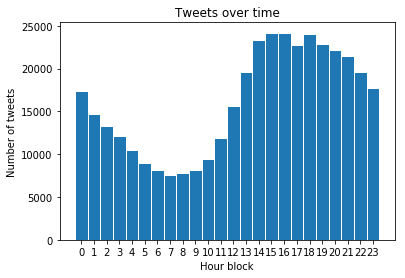

In [3]:
times_hist(times)

### 1) Create buckets based on hour blocks

In [4]:
#7 hour block
tweets_b7, times_b7 = create_bucket(tweets, times, 7)
personal_tweets_b7, personal_times_b7 = pos_tweets(tweets_b7, times_b7, ['PRP', 'PRP$'])

Time Taken:  13.296294212341309


In [5]:
#15 hour block
tweets_b15, times_b15 = create_bucket(tweets, times, 15)
personal_tweets_b15, personal_times_b15 = pos_tweets(tweets_b15, times_b15, ['PRP', 'PRP$'])

Time Taken:  45.044203996658325


In [6]:
#23 hour block
tweets_b23, times_b23 = create_bucket(tweets, times, 23)
personal_tweets_b23, personal_times_b23 = pos_tweets(tweets_b23, times_b23, ['PRP', 'PRP$'])

Time Taken:  28.599177837371826


### 2) Create samples

In [7]:
sample_b7 = np.random.choice(personal_tweets_b7, size=100)
pd.DataFrame({"tweets": sample_b7}).to_csv("samples/sample_b7.csv")

In [8]:
sample_b15 = np.random.choice(personal_tweets_b15, size=100)
pd.DataFrame({"tweets": sample_b15}).to_csv("samples/sample_b15.csv")

In [9]:
sample_b23 = np.random.choice(personal_tweets_b23, size=100)
pd.DataFrame({"tweets": sample_b23}).to_csv("samples/sample_b23.csv")

# Find Personal Tweets First. Then Find Verbs

In [10]:
tags = ['VB', 'VBG', 'VBD']

### 1) 'PRP' Tagger Only

In [11]:
df1 = pd.read_csv("PRP_verbs.csv", lineterminator='\n')
df1_tweets = list(df1["tweets"])
df1_times = list(df1["times"])
len(df1_tweets)

74428

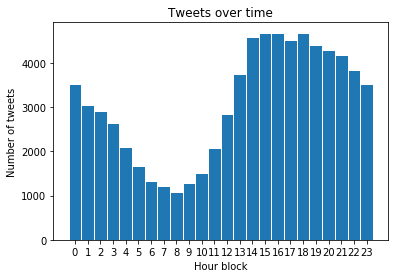

In [12]:
times_hist(df1_times)

In [13]:
sample_PRP = np.random.choice(df1_tweets, size=100)
pd.DataFrame({"tweets": sample_PRP}).to_csv("samples/sample_PRP.csv")

### 2) 'PRP' and 'PRP$'

In [14]:
df2 = pd.read_csv("PRPandPRP$_verbs.csv", lineterminator='\n')
df2_tweets = list(df2["tweets"])
df2_times = list(df2["times"])
len(df2_tweets)

86786

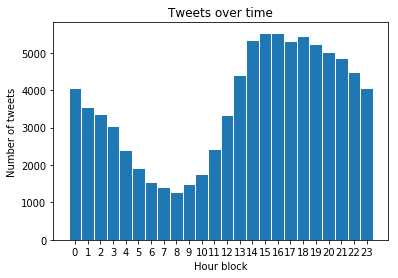

In [15]:
times_hist(df2_times)

In [16]:
sample_both = np.random.choice(df2_tweets, size=100)
pd.DataFrame({"tweets": sample_both}).to_csv("samples/sample_PRPandPRP$.csv")

### 3) 'PRP$' Only

In [17]:
df3 = pd.read_csv("PRP$_verbs.csv", lineterminator='\n')
df3_tweets = list(df3["tweets"])
df3_times = list(df3["times"])
len(df3_tweets)

23883

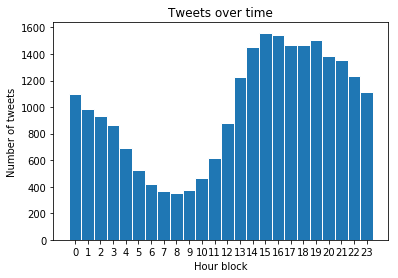

In [18]:
times_hist(df3_times)

In [19]:
sample_PRP2 = np.random.choice(df3_tweets, size=100)
pd.DataFrame({"tweets": sample_PRP2}).to_csv("samples/sample_PRP$.csv")